In [3]:
import numpy as np 
import sys 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import os 
from matplotlib import colors as mcolors



In [16]:
def myform(a): 
    return r"${:3.1f}$".format(a)
def readdata(filename, occupation): 
    unsortdata =  np.loadtxt(filename,comments="#")
    unsortsel = unsortdata[unsortdata[:,4]==occupation]
    if len(unsortsel)==0: sys.exit("no data with the required occupation")
    order = np.lexsort((-unsortsel[:,0], unsortsel[:,4], unsortsel [:,3], unsortsel[:,-1]))    
    data = np.array([unsortsel[i] for i in order ])
    return data[data[:,-1]==0],data[data[:,-1]==1]

    

In [5]:
def complot(x,y,col,mark,al,lin,collab = None ):
    plt.plot(x,y,color='black',linestyle=lin)
    if collab is not None: 
        plt.scatter(x,y,marker = mark,color=col,alpha=al,s=40, label = collab,edgecolor = 'black', linewidth=0.6)
    else: 
        plt.scatter(x,y,marker = mark,color=col,alpha=al,s =40, edgecolor = 'black', linewidth=0.6)   

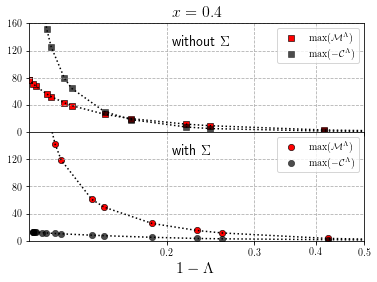

In [21]:
filename = "../data/rawdata_phasediag_tpri080.txt"
top, bottom = readdata(filename,0.600)
ax1 = plt.subplot(211)
plt.title(r'$x=0.4$',fontsize = 16)
complot((top[:,0]),4*top[:,8],'red','s',1.0,'dotted',collab=r'$\mathrm{max}(\mathcal{M}^\Lambda)$')     
complot((top[:,0]),4*top[:,9],'black','s',0.7,'dotted',collab=r'$\mathrm{max}(-\mathcal{C}^\Lambda)$')
ax1.tick_params(axis='x',which='both',labelbottom='off')
ax2 = plt.subplot(212)
complot((bottom[:,0]),4*bottom[:,8],'red','o',1.0,'dotted',collab=r'$\mathrm{max}(\mathcal{M}^\Lambda)$')     
complot((bottom[:,0]),4*bottom[:,9],'black','o',0.7,'dotted',collab=r'$\mathrm{max}(-\mathcal{C}^\Lambda)$')

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_ylim([0.,4*40.])
    ax.set_xticks(np.arange(0.,1.,0.1))
    ax.set_xlim([np.min([top[-1,0],bottom[-1,0]]),0.5])
    ax.xaxis.grid(linestyle = 'dashed')
    ax.yaxis.grid(linestyle = 'dashed')
    ax.legend()

ax1.set_yticks(np.arange(0.,4*40.+1,40.))
ax2.set_yticks(np.arange(0., 4*40.,40.))
    
ax2.set_xlabel(r'$1-\Lambda$',fontsize=16)
xt= 0.205
yt= 4*32.
ax1.text(xt,yt,r'without $\Sigma$',fontsize=14)
ax2.text(xt,yt,r'with $\Sigma$',fontsize=14)
ax2.tick_params(axis='x',which= 'major', labelbottom='on' )
ax2.tick_params(axis='x', which= 'minor', labelbottom='off')
ax2.set_xticklabels([myform(a) for a in np.arange(0.,1.,0.1)])
plt.subplots_adjust(hspace=0)
namefig = '../images/chargeproblem_MC_vs_Lambda_fix_occ.png'
plt.savefig(namefig, dpi=300)

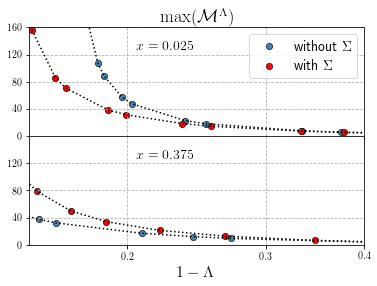

In [17]:
filename = "../data/rawdata_phasediag_tpri080.txt"
top, bottom = readdata(filename,0.975)
top1,bottom1= readdata(filename,0.625)
ax1 = plt.subplot(211)
plt.title(r'$\mathrm{max}(\mathcal{M}^\Lambda)$',size=18)
complot((top[:,0]),4*top[:,8],'steelblue','o',1.0,'dotted',collab=r'without $\Sigma$')     
complot((bottom[:,0]),4*bottom[:,8],'red','o',1.0,'dotted',collab=r'with $\Sigma$')
ax1.tick_params(axis='x',which='both',labelbottom='off')
ax2 = plt.subplot(212)
complot((top1[:,0]),4*top1[:,8],'steelblue','o',1.0,'dotted',collab=r'without $\Sigma$')     
complot((bottom1[:,0]),4*bottom1[:,8],'red','o',1.0,'dotted',collab=r'with $\Sigma$')

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_ylim([0.,4*40.])
    ax.set_xticks(np.arange(0.,1.,0.1))
    #ax.set_xlim([np.max([top[-1,0],bottom[-1,0],top[-1,0],bottom[-1,0]]),0.5])
    ax.set_xlim([0.15,0.4])
    ax.xaxis.grid(linestyle = 'dashed')
    ax.yaxis.grid(linestyle = 'dashed')
    
ax1.set_yticks(np.arange(0.,4*40.+1,40.))
ax2.set_yticks(np.arange(0.,4*40.,40.))

ax1.legend(loc=1,fontsize=14)
ax2.set_xlabel(r'$1-\Lambda$', fontsize =16)
xt= 0.205
yt= 4*32.
ax1.text(xt,yt,r'$x=0.025$',fontsize=14)
ax2.text(xt,yt,r'$x=0.375$',fontsize=14)
ax2.tick_params(axis='x',which= 'major', labelbottom='on' )
ax2.tick_params(axis='x', which= 'minor', labelbottom='off')
ax2.set_xticklabels([myform(a) for a in np.arange(0.,1.,0.1)])
yti = [myform(a) for a in np.arange(0.,3*40.,50.)]
plt.subplots_adjust(hspace=0)
namefig = '../images/chargeproblem_M_vs_Lambda_diff_occ.png'
plt.savefig(namefig, dpi=300)